<a href="https://www.kaggle.com/code/shivankv098/mcdonald-s-financial-statements-2002-2022?scriptVersionId=164349870" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mcdonalds-financial-statements-2002-2022/McDonalds_financial_statements.csv


In [2]:
df = pd.read_csv('/kaggle/input/mcdonalds-financial-statements-2002-2022/McDonalds_financial_statements.csv')
df

,Year,Market cap ($B),Revenue ($B),Earnings ($B),P/E ratio,P/S ratio,P/B ratio,Operating Margin (%),EPS ($),Shares Outstanding ($B),Cash on Hand ($B),Dividend Yield (%),Dividend (stock split adjusted) ($),Net assets ($B),Total assets ($B),Total debt ($B),Total liabilities ($B)
0,2022,193.01,23.18,7.82,31.3,8.33,-32.20,33.76,8.42,0.73,2.58,2.15,5.66,-6.01,50.43,48.03,56.43
1,2021,200.31,23.22,9.12,26.5,8.63,-43.50,39.31,10.11,0.74,4.70,1.96,5.25,-4.61,53.60,48.64,58.20
2,2020,159.88,19.20,6.14,33.8,8.32,-20.40,31.97,6.35,0.74,3.44,2.35,5.04,-7.83,52.62,48.51,60.45
3,2019,147.47,21.28,8.01,24.8,6.93,-18.00,38.04,7.98,0.74,0.89,2.39,4.73,-8.22,47.51,46.87,55.72
4,2018,136.21,21.02,7.81,23.2,6.48,-21.80,37.17,7.65,0.76,0.86,2.36,4.19,-6.26,32.81,31.07,39.06
5,2017,137.21,22.82,8.57,26.7,6.01,-42.00,37.57,6.46,0.79,2.46,2.23,3.83,-3.27,33.80,29.53,37.07
6,2016,101.08,24.62,6.86,22.0,4.11,-45.90,27.89,5.53,0.81,1.22,2.97,3.61,-2.21,31.02,25.95,33.22
7,2015,107.12,25.41,6.55,24.2,4.22,15.10,25.80,4.88,0.90,7.68,2.91,3.44,7.08,37.93,24.12,30.85
8,2014,90.22,27.44,7.37,19.2,3.29,7.02,26.86,4.87,0.96,2.07,3.50,3.28,12.85,34.28,14.98,21.42
9,2013,96.09,28.10,8.20,17.3,3.42,6.00,29.19,5.60,0.99,2.79,3.22,3.12,16.00,36.62,14.12,20.61


In [3]:
df.describe()

,Year,Market cap ($B),Revenue ($B),Earnings ($B),P/E ratio,P/S ratio,P/B ratio,Operating Margin (%),EPS ($),Shares Outstanding ($B),Cash on Hand ($B),Dividend Yield (%),Dividend (stock split adjusted) ($),Net assets ($B),Total assets ($B),Total debt ($B),Total liabilities ($B)
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,2012.000000,96.824286,22.706190,6.214762,21.661905,4.234762,-7.100000,26.889048,4.852857,0.994762,2.387619,2.487143,2.754286,7.217143,35.016190,21.286190,27.793810
std,6.204837,50.396346,3.398316,2.226166,5.541974,2.266896,19.356029,8.355580,2.507501,0.200714,1.639948,0.575518,1.679874,9.489797,8.715523,14.922204,16.800857
min,2002.000000,20.390000,15.400000,1.660000,15.000000,1.320000,-45.900000,10.790000,0.700000,0.730000,0.330000,1.460000,0.240000,-8.220000,23.970000,8.430000,13.540000
25%,2007.000000,67.220000,20.810000,3.880000,16.500000,2.950000,-20.400000,19.300000,2.880000,0.790000,1.370000,2.150000,1.500000,-3.270000,29.390000,10.140000,14.840000
50%,2012.000000,90.220000,22.820000,6.860000,21.400000,3.360000,2.870000,28.520000,4.880000,1.000000,2.130000,2.390000,2.870000,12.850000,32.810000,13.630000,20.090000
75%,2017.000000,136.210000,24.620000,8.010000,24.800000,6.010000,5.530000,31.970000,6.350000,1.180000,2.580000,2.940000,3.830000,14.630000,36.620000,29.530000,37.070000
max,2022.000000,200.310000,28.100000,9.120000,33.800000,8.630000,15.100000,39.310000,10.110000,1.270000,7.680000,3.500000,5.660000,16.000000,53.600000,48.640000,60.450000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Year                                 21 non-null     int64  
 1   Market cap ($B)                      21 non-null     float64
 2   Revenue ($B)                         21 non-null     float64
 3   Earnings ($B)                        21 non-null     float64
 4   P/E ratio                            21 non-null     float64
 5   P/S ratio                            21 non-null     float64
 6   P/B ratio                            21 non-null     float64
 7   Operating Margin (%)                 21 non-null     float64
 8   EPS ($)                              21 non-null     float64
 9   Shares Outstanding ($B)              21 non-null     float64
 10  Cash on Hand ($B)                    21 non-null     float64
 11  Dividend Yield (%)                

In [5]:
df

,Year,Market cap ($B),Revenue ($B),Earnings ($B),P/E ratio,P/S ratio,P/B ratio,Operating Margin (%),EPS ($),Shares Outstanding ($B),Cash on Hand ($B),Dividend Yield (%),Dividend (stock split adjusted) ($),Net assets ($B),Total assets ($B),Total debt ($B),Total liabilities ($B)
0,2022,193.01,23.18,7.82,31.3,8.33,-32.20,33.76,8.42,0.73,2.58,2.15,5.66,-6.01,50.43,48.03,56.43
1,2021,200.31,23.22,9.12,26.5,8.63,-43.50,39.31,10.11,0.74,4.70,1.96,5.25,-4.61,53.60,48.64,58.20
2,2020,159.88,19.20,6.14,33.8,8.32,-20.40,31.97,6.35,0.74,3.44,2.35,5.04,-7.83,52.62,48.51,60.45
3,2019,147.47,21.28,8.01,24.8,6.93,-18.00,38.04,7.98,0.74,0.89,2.39,4.73,-8.22,47.51,46.87,55.72
4,2018,136.21,21.02,7.81,23.2,6.48,-21.80,37.17,7.65,0.76,0.86,2.36,4.19,-6.26,32.81,31.07,39.06
5,2017,137.21,22.82,8.57,26.7,6.01,-42.00,37.57,6.46,0.79,2.46,2.23,3.83,-3.27,33.80,29.53,37.07
6,2016,101.08,24.62,6.86,22.0,4.11,-45.90,27.89,5.53,0.81,1.22,2.97,3.61,-2.21,31.02,25.95,33.22
7,2015,107.12,25.41,6.55,24.2,4.22,15.10,25.80,4.88,0.90,7.68,2.91,3.44,7.08,37.93,24.12,30.85
8,2014,90.22,27.44,7.37,19.2,3.29,7.02,26.86,4.87,0.96,2.07,3.50,3.28,12.85,34.28,14.98,21.42
9,2013,96.09,28.10,8.20,17.3,3.42,6.00,29.19,5.60,0.99,2.79,3.22,3.12,16.00,36.62,14.12,20.61


In [6]:
df.Year = pd.to_datetime(df.Year, format='%Y')
df

,Year,Market cap ($B),Revenue ($B),Earnings ($B),P/E ratio,P/S ratio,P/B ratio,Operating Margin (%),EPS ($),Shares Outstanding ($B),Cash on Hand ($B),Dividend Yield (%),Dividend (stock split adjusted) ($),Net assets ($B),Total assets ($B),Total debt ($B),Total liabilities ($B)
0,2022-01-01,193.01,23.18,7.82,31.3,8.33,-32.20,33.76,8.42,0.73,2.58,2.15,5.66,-6.01,50.43,48.03,56.43
1,2021-01-01,200.31,23.22,9.12,26.5,8.63,-43.50,39.31,10.11,0.74,4.70,1.96,5.25,-4.61,53.60,48.64,58.20
2,2020-01-01,159.88,19.20,6.14,33.8,8.32,-20.40,31.97,6.35,0.74,3.44,2.35,5.04,-7.83,52.62,48.51,60.45
3,2019-01-01,147.47,21.28,8.01,24.8,6.93,-18.00,38.04,7.98,0.74,0.89,2.39,4.73,-8.22,47.51,46.87,55.72
4,2018-01-01,136.21,21.02,7.81,23.2,6.48,-21.80,37.17,7.65,0.76,0.86,2.36,4.19,-6.26,32.81,31.07,39.06
5,2017-01-01,137.21,22.82,8.57,26.7,6.01,-42.00,37.57,6.46,0.79,2.46,2.23,3.83,-3.27,33.80,29.53,37.07
6,2016-01-01,101.08,24.62,6.86,22.0,4.11,-45.90,27.89,5.53,0.81,1.22,2.97,3.61,-2.21,31.02,25.95,33.22
7,2015-01-01,107.12,25.41,6.55,24.2,4.22,15.10,25.80,4.88,0.90,7.68,2.91,3.44,7.08,37.93,24.12,30.85
8,2014-01-01,90.22,27.44,7.37,19.2,3.29,7.02,26.86,4.87,0.96,2.07,3.50,3.28,12.85,34.28,14.98,21.42
9,2013-01-01,96.09,28.10,8.20,17.3,3.42,6.00,29.19,5.60,0.99,2.79,3.22,3.12,16.00,36.62,14.12,20.61


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


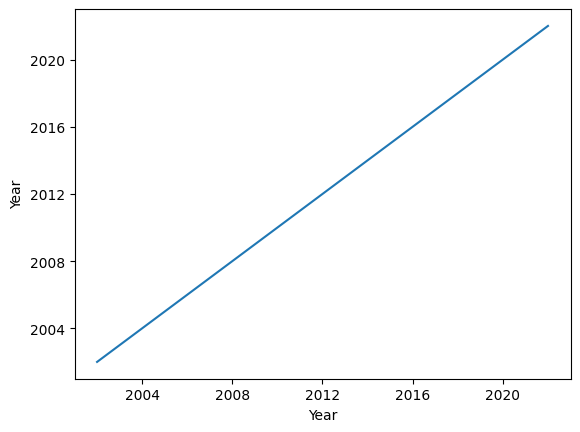

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


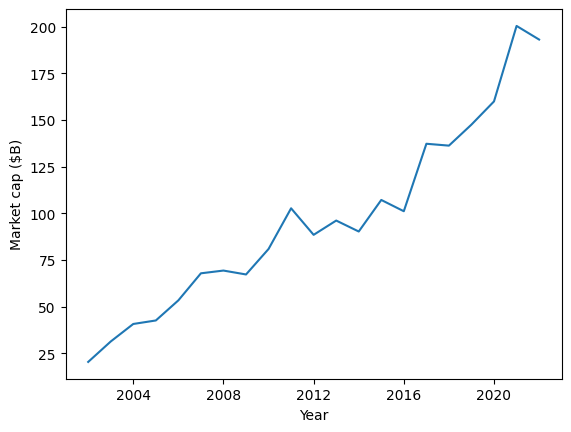

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


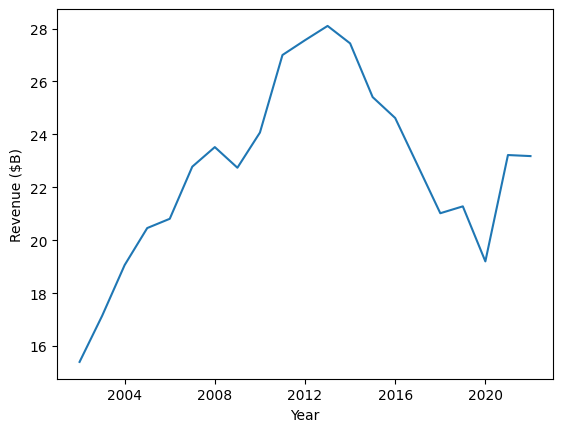

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


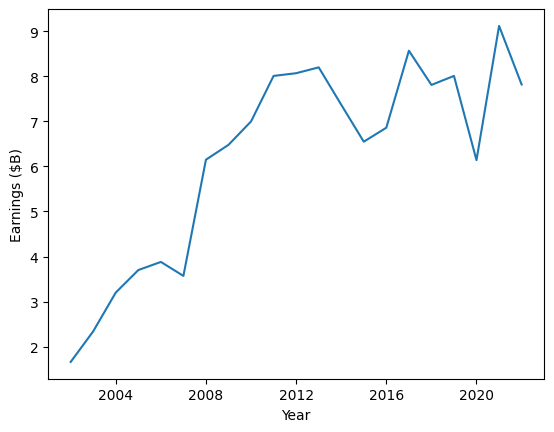

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


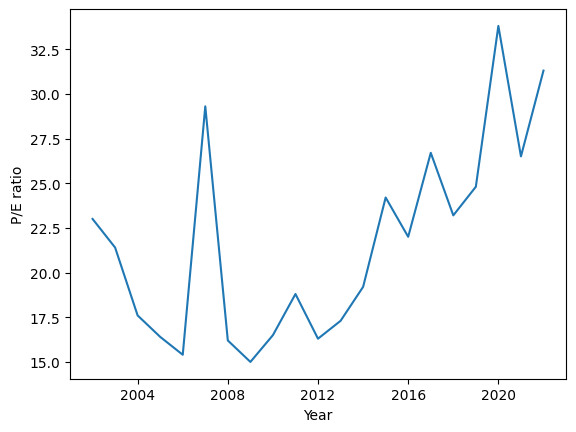

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


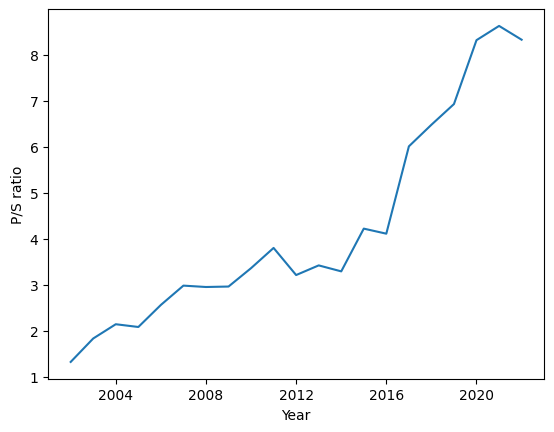

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


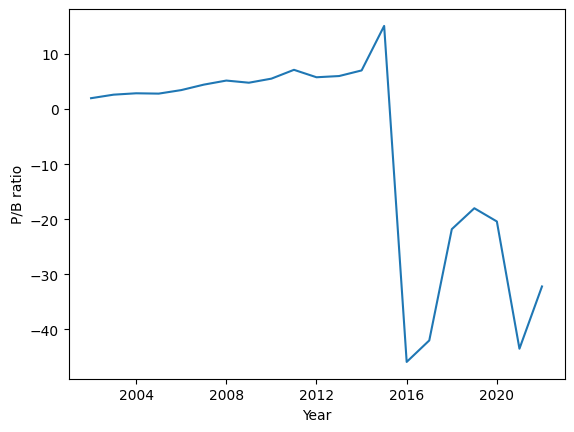

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


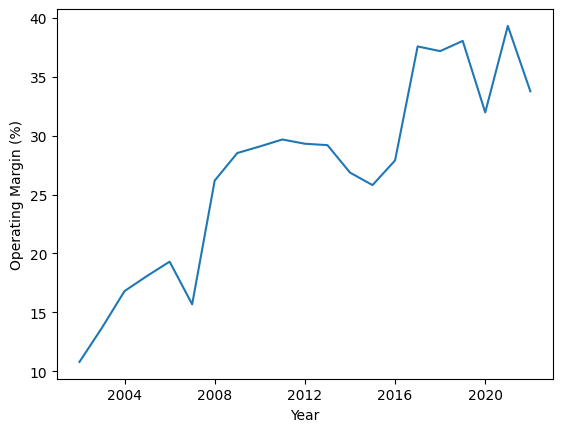

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


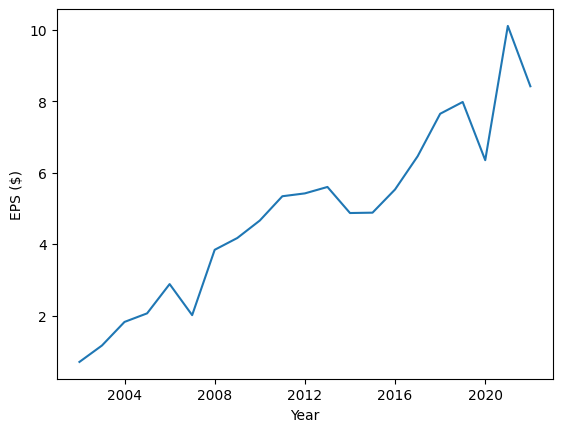

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


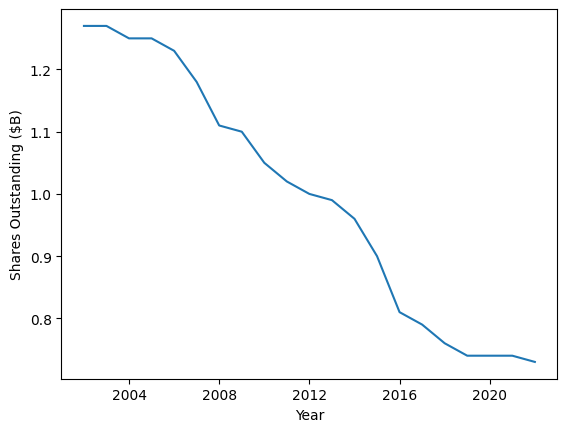

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


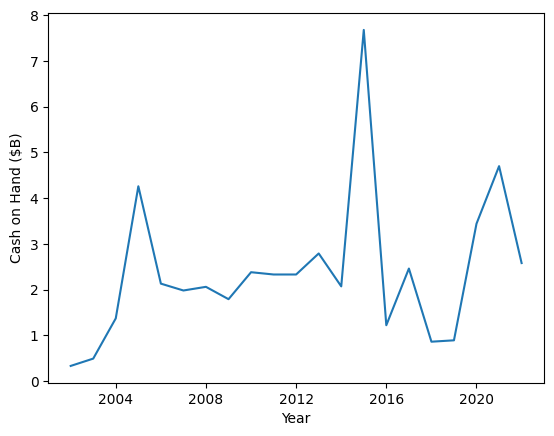

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


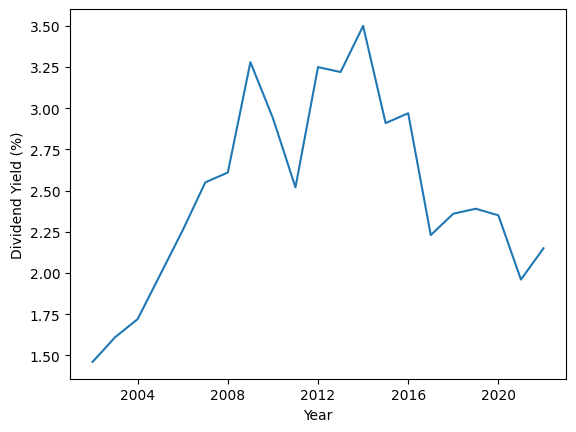

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


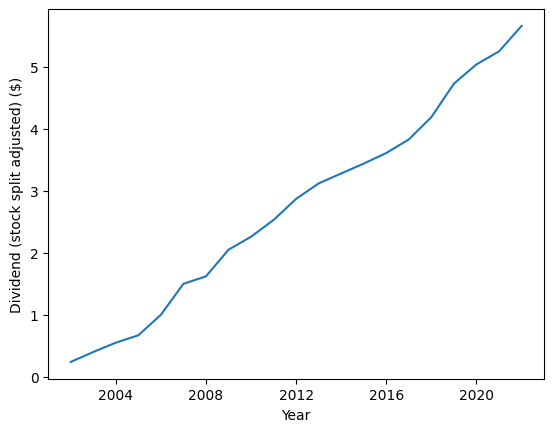

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


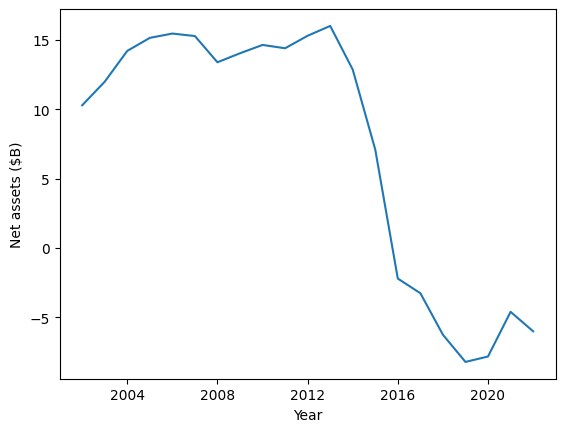

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


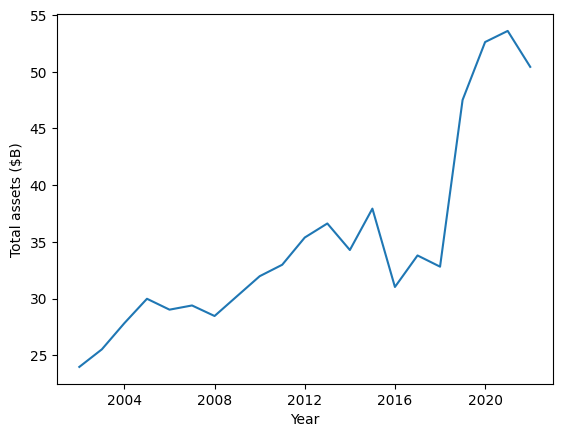

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


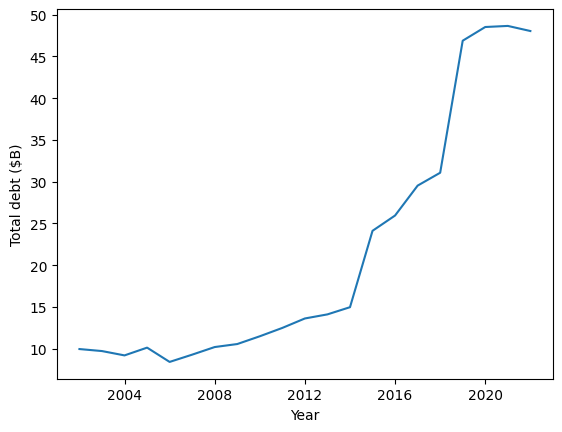

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


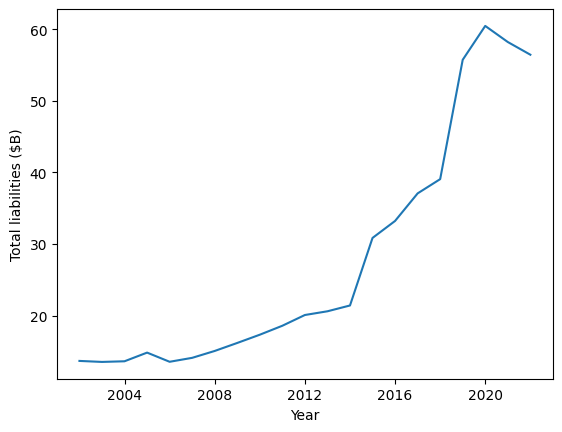

In [7]:
for col in df.columns:
    sns.lineplot(data=df, x=df['Year'], y=df[col])
    plt.show()

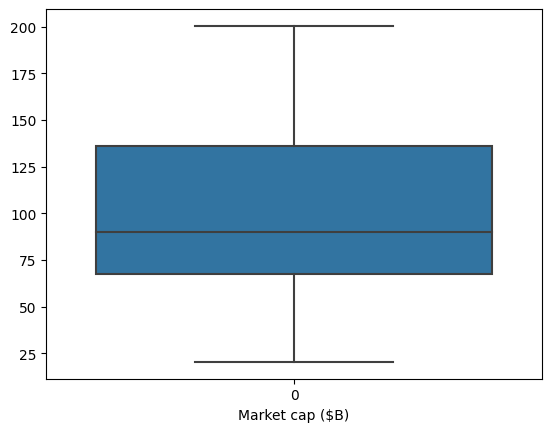

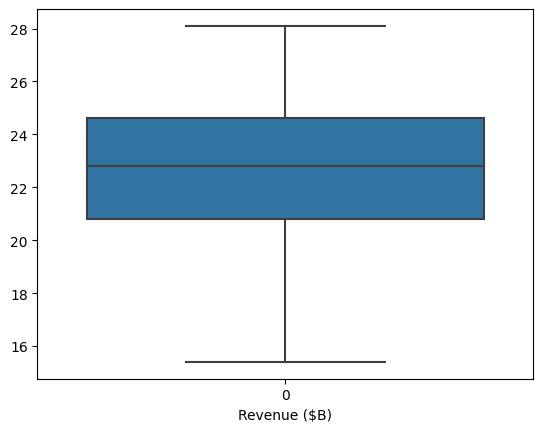

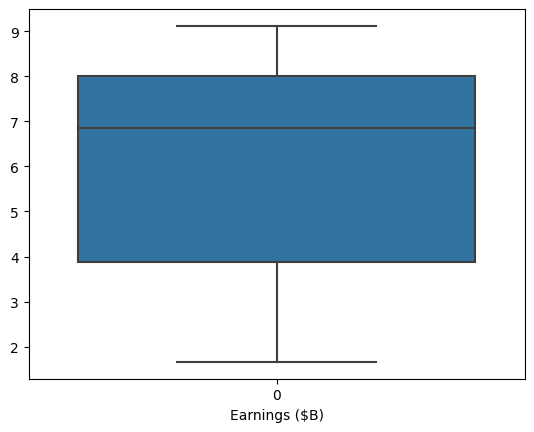

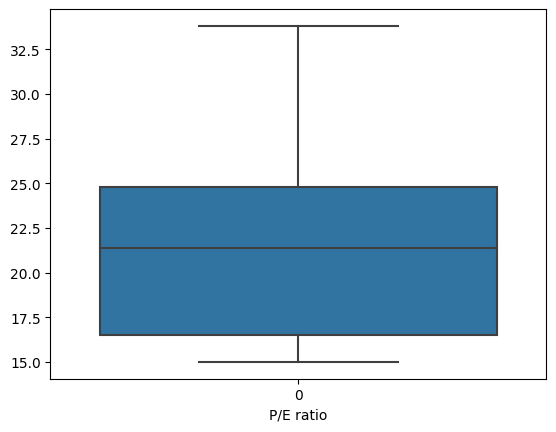

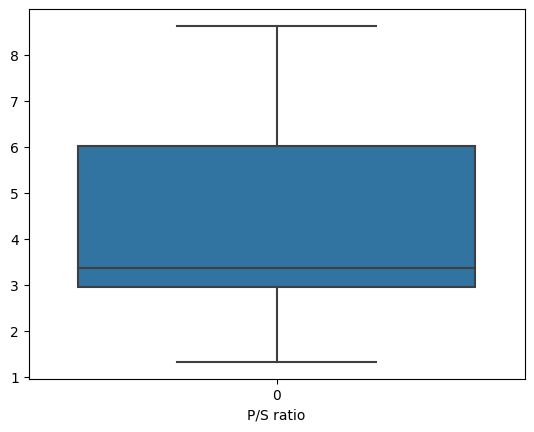

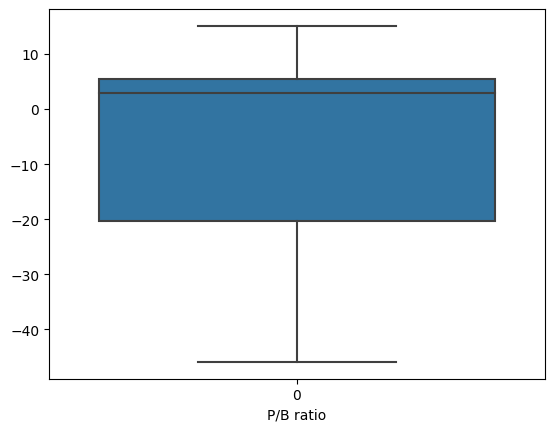

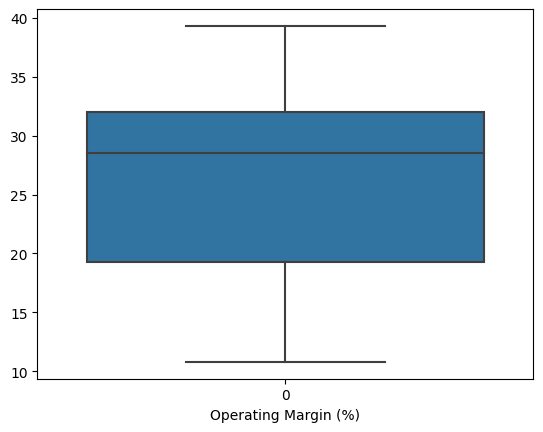

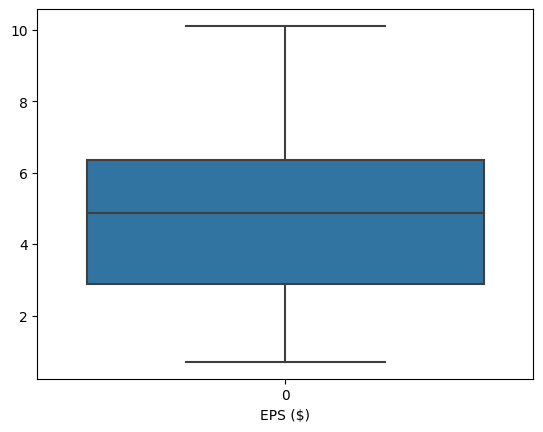

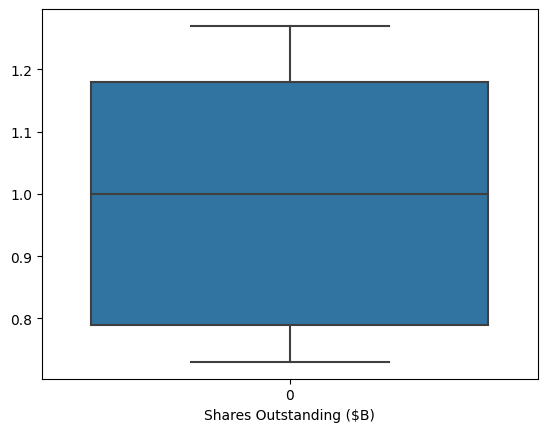

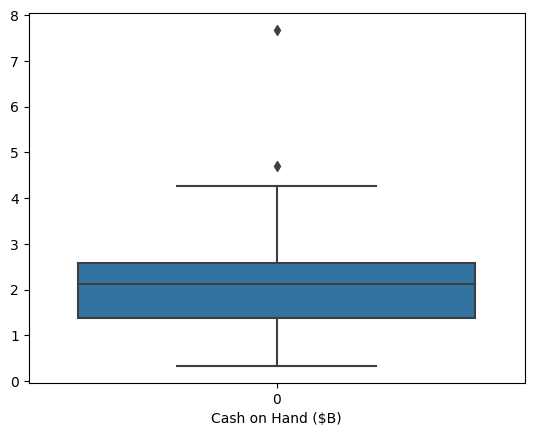

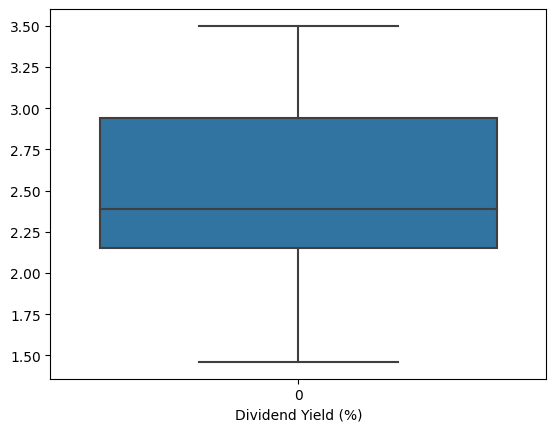

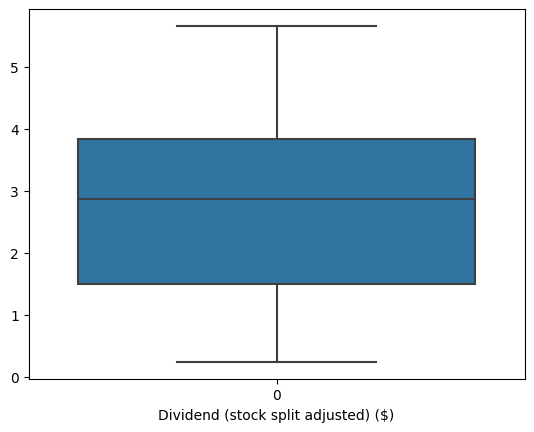

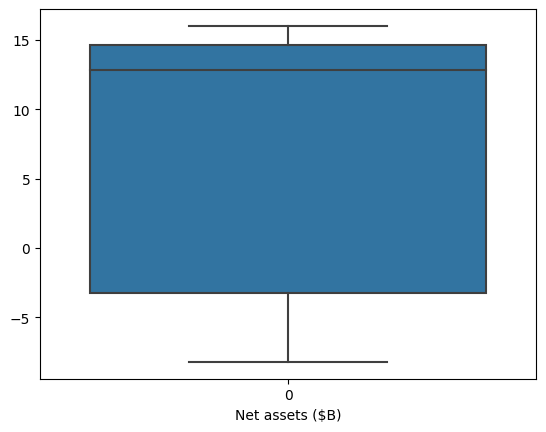

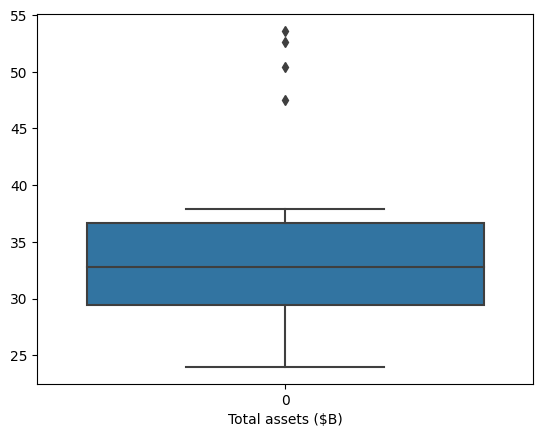

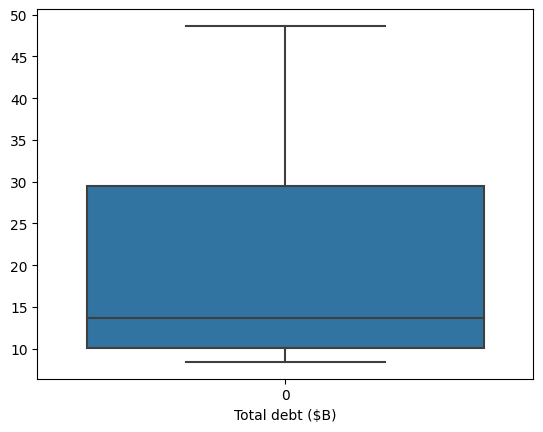

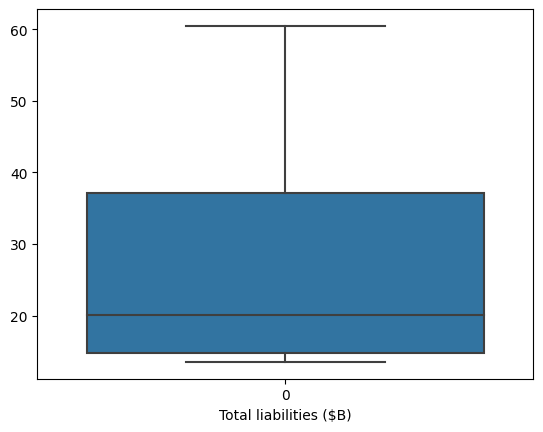

In [8]:
for col in df.columns:
    if df[col].dtype == 'int' or df[col].dtype == 'float':
        sns.boxplot(df[col])
        plt.xlabel(col)
        plt.show()

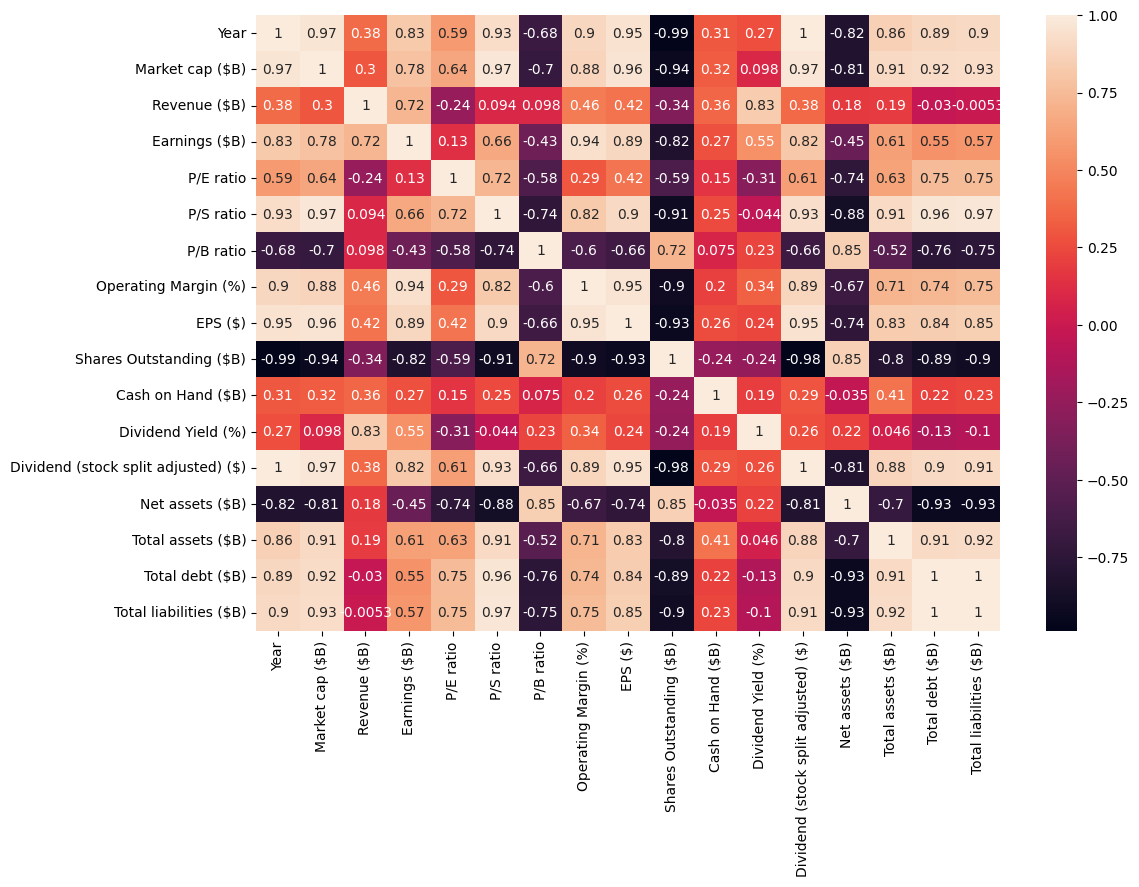

In [9]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True)
plt.show()